<a href="https://colab.research.google.com/github/ov-nastia/Machine_learning_Ovchinnik/blob/main/lab_9_2_Ovchinnik.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import VGG16
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Завантаження та підготовка даних
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [4]:
# Перетворення зображень у формат RGB (VGG16 очікує 3 канали)
train_images = tf.image.grayscale_to_rgb(tf.expand_dims(train_images, -1))
test_images = tf.image.grayscale_to_rgb(tf.expand_dims(test_images, -1))

In [5]:
# Перетворення в float32 і нормалізація даних
train_images = tf.cast(train_images, tf.float32) / 255.0
test_images = tf.cast(test_images, tf.float32) / 255.0


In [6]:
# Зміна розміру зображень до 32x32 (найменший розмір, який підтримує VGG16)
train_images = tf.image.resize(train_images, (32, 32))
test_images = tf.image.resize(test_images, (32, 32))

In [7]:
# Завантаження VGG16 без верхніх шарів
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [8]:
# Заморожування перших шарів (виділення ознак)
for layer in base_model.layers[:-4]:
    layer.trainable = False

In [9]:
# Створення моделі
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(10, activation='sigmoid')
])

In [10]:
# Компіляція моделі
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
# Функція для зміни швидкості навчання
def scheduler(epoch, lr):
  if epoch < 5:
    return lr
  else:
    return float(lr * np.exp(-0.1))

callback = tf.keras.callbacks.LearningRateScheduler(scheduler)

In [12]:
# Тренування моделі
history = model.fit(train_images, train_labels, epochs=50,
                    validation_split=0.2,
                    batch_size=128,
                    callbacks=[callback])

Epoch 1/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 20s 32ms/step - accuracy: 0.7562 - loss: 0.6800 - val_accuracy: 0.8676 - val_loss: 0.3614 - learning_rate: 0.0010
Epoch 2/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 0.8833 - loss: 0.3298 - val_accuracy: 0.8877 - val_loss: 0.2993 - learning_rate: 0.0010
Epoch 3/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - accuracy: 0.8956 - loss: 0.2837 - val_accuracy: 0.8935 - val_loss: 0.3024 - learning_rate: 0.0010
Epoch 4/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 0.9035 - loss: 0.2571 - val_accuracy: 0.9012 - val_loss: 0.2716 - learning_rate: 0.0010
Epoch 5/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - accuracy: 0.8887 - loss: 0.2410 - val_accuracy: 0.8993 - val_loss: 0.2955 - learning_rate: 0.0010
Epoch 6/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 0.9104 - loss: 0.2223 - val_accuracy: 0.8925 - val_loss: 0.2740 - learning_rate: 9.0484e-04
Epoch 7/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 0.8935 - l

In [13]:
# Оцінка моделі
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\nТочність на тестових даних: {test_acc}')

313/313 - 6s - 19ms/step - accuracy: 0.8764 - loss: 1.4090

Точність на тестових даних: 0.8763999938964844


In [14]:
# Розморожування всіх шарів для тонкого налаштування
base_model.trainable = True

In [15]:
# Перекомпіляція моделі
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
# Донавчання моделі
history_fine = model.fit(train_images, train_labels, epochs=50,
                         validation_split=0.2,
                         batch_size=64,
                         callbacks=[callback])

Epoch 1/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 25s 26ms/step - accuracy: 0.8614 - loss: 0.1993 - val_accuracy: 0.8808 - val_loss: 0.3048 - learning_rate: 0.0010
Epoch 2/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 31s 17ms/step - accuracy: 0.8818 - loss: 0.1605 - val_accuracy: 0.8651 - val_loss: 0.3282 - learning_rate: 0.0010
Epoch 3/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 21s 18ms/step - accuracy: 0.8985 - loss: 0.1712 - val_accuracy: 0.8921 - val_loss: 0.3608 - learning_rate: 0.0010
Epoch 4/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 21s 18ms/step - accuracy: 0.8658 - loss: 0.1637 - val_accuracy: 0.8115 - val_loss: 0.3596 - learning_rate: 0.0010
Epoch 5/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 16s 22ms/step - accuracy: 0.8534 - loss: 0.1586 - val_accuracy: 0.8322 - val_loss: 0.3298 - learning_rate: 0.0010
Epoch 6/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 17s 18ms/step - accuracy: 0.8672 - loss: 0.1406 - val_accuracy: 0.8120 - val_loss: 0.3428 - learning_rate: 9.0484e-04
Epoch 7/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - accuracy: 0.8571

In [17]:
# Оцінка моделі
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\nТочність на тестових даних: {test_acc}')

313/313 - 2s - 8ms/step - accuracy: 0.9098 - loss: 2.1877

Точність на тестових даних: 0.9097999930381775


In [18]:
# Функція для побудови графіків
def plot_learning_curves(history, title_suffix=""):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

    # Графік точності
    ax1.plot(history.history['accuracy'], label='Тренувальна вибірка')
    ax1.plot(history.history['val_accuracy'], label='Валідаційна вибірка')
    ax1.set_title(f'Точність моделі {title_suffix}')
    ax1.set_ylabel('Точність')
    ax1.set_xlabel('Епоха')
    ax1.legend()

    # Графік втрат
    ax2.plot(history.history['loss'], label='Тренувальна вибірка')
    ax2.plot(history.history['val_loss'], label='Валідаційна вибірка')
    ax2.set_title(f'Втрати моделі {title_suffix}')
    ax2.set_ylabel('Втрати')
    ax2.set_xlabel('Епоха')
    ax2.legend()

    plt.tight_layout()
    plt.show()

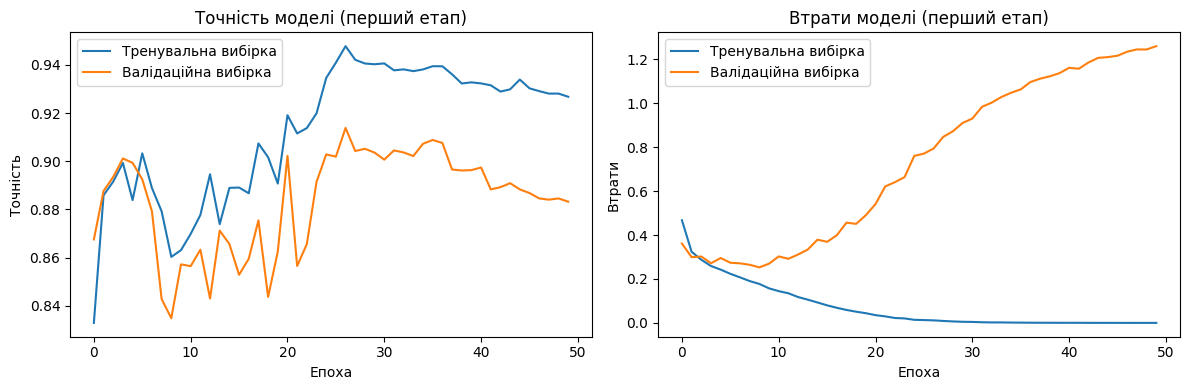

In [19]:
# Побудова графіків для першого етапу навчання
plot_learning_curves(history, "(перший етап)")

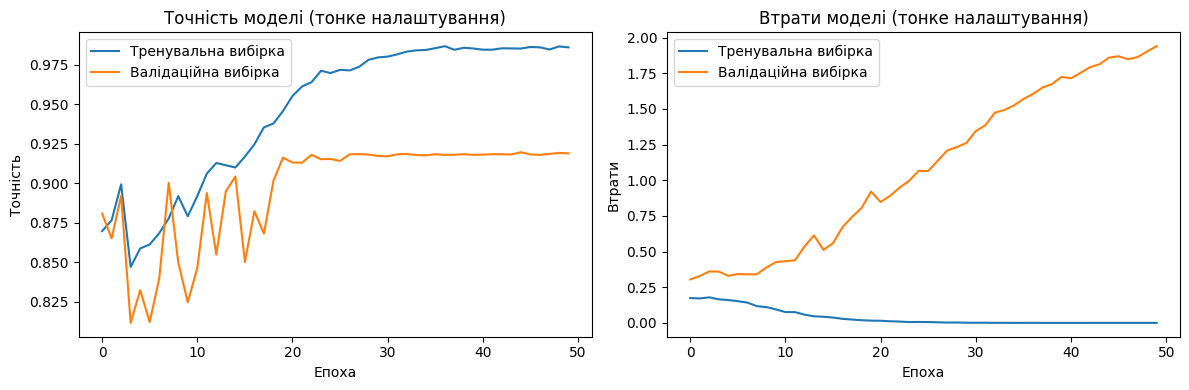

In [20]:
# Побудова графіків для етапу тонкого налаштування
plot_learning_curves(history_fine, "(тонке налаштування)")